# Hierarchical Clustering

In this notebook, we will be looking at Hierarchical Clustering. We would first discuss some details about it, then perform it on random data. 

# What is Hierarchical Clustering

Let’s say we have the below points and we want to cluster them into groups. We can assign each of these points to a separate cluster. Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left. We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Types of Hierarchical Clustering

There are mainly two types of hierarchical clustering:

* **Agglomerative hierarchical clustering:** We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning. Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left. Hence, this type of clustering is also known as additive hierarchical clustering.

* **Divisive Hierarchical clustering:** Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster. So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning. Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point. We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering.

In practice, Agglomerative Clustering is used far more often than Divisive. Agglomerative takes individual relationships into account more than Divisive and Divisive tends to have a better 'global' outlook. Most probably, the individual relationships is what going to matter. So, try with agglomerative first, if not, then try divisive.  

## Important Considerations

Now, we should discuss the important things we need to consider as we develop a hierarchical clustering model.

### Measures of distance (similarity)
In the example above, the distance between two clusters has been computed based on the length of the straight line drawn from one cluster to another. This is commonly referred to as the Euclidean distance. Many other distance metrics have been developed.

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city, city block distance may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.

### Linkage Criteria
After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the two most similar parts of a cluster (single-linkage), the two least similar bits of a cluster (complete-linkage), the center of the clusters (mean or average-linkage), or some other criterion. Many linkage criteria have been developed.

As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application. A key theoretical issue is what causes variation. For example, in archeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.

Where there are no clear theoretical justifications for the choice of linkage criteria, Ward’s method is the sensible default. This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics (e.g., ANOVA, MANOVA).

## Advantages

* No apriori information about the number of clusters required.	
* Easy to implement and gives best result in some cases.
* Hierarchical clustering outputs a hierarchy, ie a structure that is more informaHve than the unstructured set of flat clusters returned by k-means. Therefore, it is easier to decide on the number of clusters by looking at the dendrogram (see suggesHon on how to cut a dendrogram in lab8).

## Disadvantages

* Algorithm can never undo what was done previously.
* Time complexity of at least O(n2 log n) is required, where ‘n’ is the number of data points. So not suitable for large datasets
* Based on the type of distance matrix chosen for merging different algorithms can suffer with one or more of the following:
    - Sensitivity to noise and outliers
    - Breaking large clusters
    - Difficulty handling different sized clusters and convex shapes
* No objective function is directly minimized.
* Sometimes it is difficult to identify the correct number of clusters by the dendogram.

# Hierarchical Clustering on Random Data

Now we would be learning the algorithm by applying it on random data. First, let's do some imports.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Generating Random Data

We will be generating a set of data using the **make_blobs** class. 

Input these parameters into make_blobs:
* **n_samples**: The total number of points equally divided among clusters.
     - Choose a number from 10-1500
* **centers**: The number of centers to generate, or the fixed center locations.
    - Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
* **cluster_std**: The standard deviation of the clusters. The larger the number, the further apart the cluster
    - Choose a number between 0.5-1.5 

Save the result to **X1** and **y1**.

In [2]:
X1, y1 = make_blobs(n_samples=50,
                    centers=[[4, 4], [-2, -1],
                             [1, 1], [10, 4]],
                    cluster_std=0.9)

Plot the scatter plot of the randomly generated data


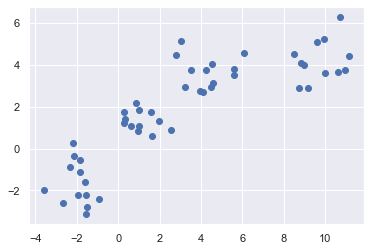

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

## Creating the Model

We will start by clustering the random data points we just created.

The **Agglomerative Clustering** class will require two inputs:
* **n_clusters**: The number of clusters to form as well as the number of centroids to generate. We would be using the value of 4 
* **linkage**: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. We would be using 'complete.' Although you can try other types and see the results.

In [4]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

Fit the model with **X1** from the generated data above.

In [5]:
agglom.fit(X1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [6]:
labels = agglom.labels_
labels

array([1, 3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 3, 3, 3, 0,
       2, 3, 1, 3, 2, 2, 2, 2, 1, 3, 3, 0, 3, 1, 1, 2, 2, 1, 1, 0, 2, 1,
       0, 2, 0, 1, 1, 1], dtype=int64)

##  Visual Plot

Now we will see the results by plotting them.

<AxesSubplot:xlabel='X', ylabel='Y'>

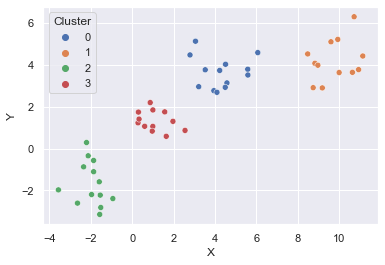

In [7]:
df_random = pd.DataFrame(X1, columns=['X', 'Y'])
df_random['Cluster'] = labels
sns.scatterplot(data=df_random, x='X', y='Y', hue='Cluster', palette='deep')

Here's how they were originally:

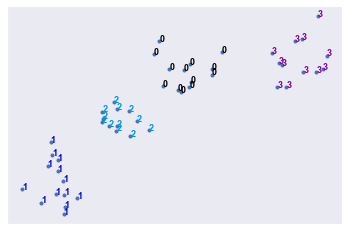

In [8]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6, 4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()